# CALIDAD DE DATOS

## IMPORTACIÓN DE PAQUETES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

%config IPCompleter.greedy = True

## IMPORTAR LOS DATOS

In [2]:
df = pd.read_csv('../../02_Datos/03_Trabajo/trabajo.csv',index_col=0)
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


## CORRECCIÓN DE NOMBRES DE VARIABLES

In [3]:
df.rename(columns={'STG':'stg',
                   'SCG':'scg',
                   'STR':'str',
                   'LPR':'lpr',
                   'PEG':'peg',
                   ' UNS':'level'
                   },inplace=True)

df


,stg,scg,str,lpr,peg,level
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


## VISIÓN GENERAL

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stg     258 non-null    float64
 1   scg     258 non-null    float64
 2   str     258 non-null    float64
 3   lpr     258 non-null    float64
 4   peg     258 non-null    float64
 5   level   258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 14.1+ KB


## TIPOS DE DATOS

In [5]:
df.dtypes

stg      float64
scg      float64
str      float64
lpr      float64
peg      float64
level     object
dtype: object

No se aplica ninguna corrección

## VALORES ÚNICOS

In [6]:
df.nunique()

stg      104
scg       89
str       83
lpr       80
peg       80
level      4
dtype: int64

No se detecta ninguna constante dentro de las variables

## DUPLICADOS

In [7]:
df.duplicated().sum()

0

No hay duplicados en el dataset.

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

In [8]:
num = df.select_dtypes(exclude='O').copy()
cat = df.select_dtypes(include='O').copy()

## GESTIÓN DE CATEGÓRICAS

### Estadísticos y Gráficos dee las variables Categóricas

In [9]:
def estadisticos_cat(df_cat):
    #Calculamos describe
    estadisticos = df_cat.describe().T
    return estadisticos

estadisticos_cat(cat)


,count,unique,top,freq
level,258,4,Middle,88


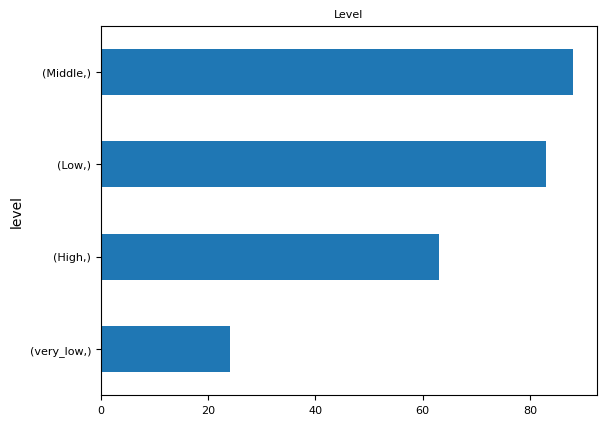

In [10]:
cat.value_counts(ascending= True).plot.barh()
plt.title('Level', fontsize= 8)
plt.tick_params(labelsize = 8)


### Gestión de Nulos

In [11]:
cat.isna().sum()

level    0
dtype: int64

No hay nulos

## GESTIÓN DE NUMÉRICAS

### Estadísticos y Gráficos de las variables numéricas

In [12]:
def estadisticos_cont(df_cont):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = df_cont.median()
    #Reordenamos la variables para que la mediana salga tras la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return estadisticos

estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
stg,258.0,0.371147,0.3270,0.210271,0.0,0.24075,0.3270,0.4950,0.99
scg,258.0,0.355674,0.3025,0.211962,0.0,0.21000,0.3025,0.4975,0.90
str,258.0,0.468004,0.4900,0.245940,0.0,0.29125,0.4900,0.6900,0.95
lpr,258.0,0.432713,0.3300,0.248108,0.0,0.25000,0.3300,0.6475,0.99
peg,258.0,0.458539,0.5000,0.255211,0.0,0.25000,0.5000,0.6600,0.93


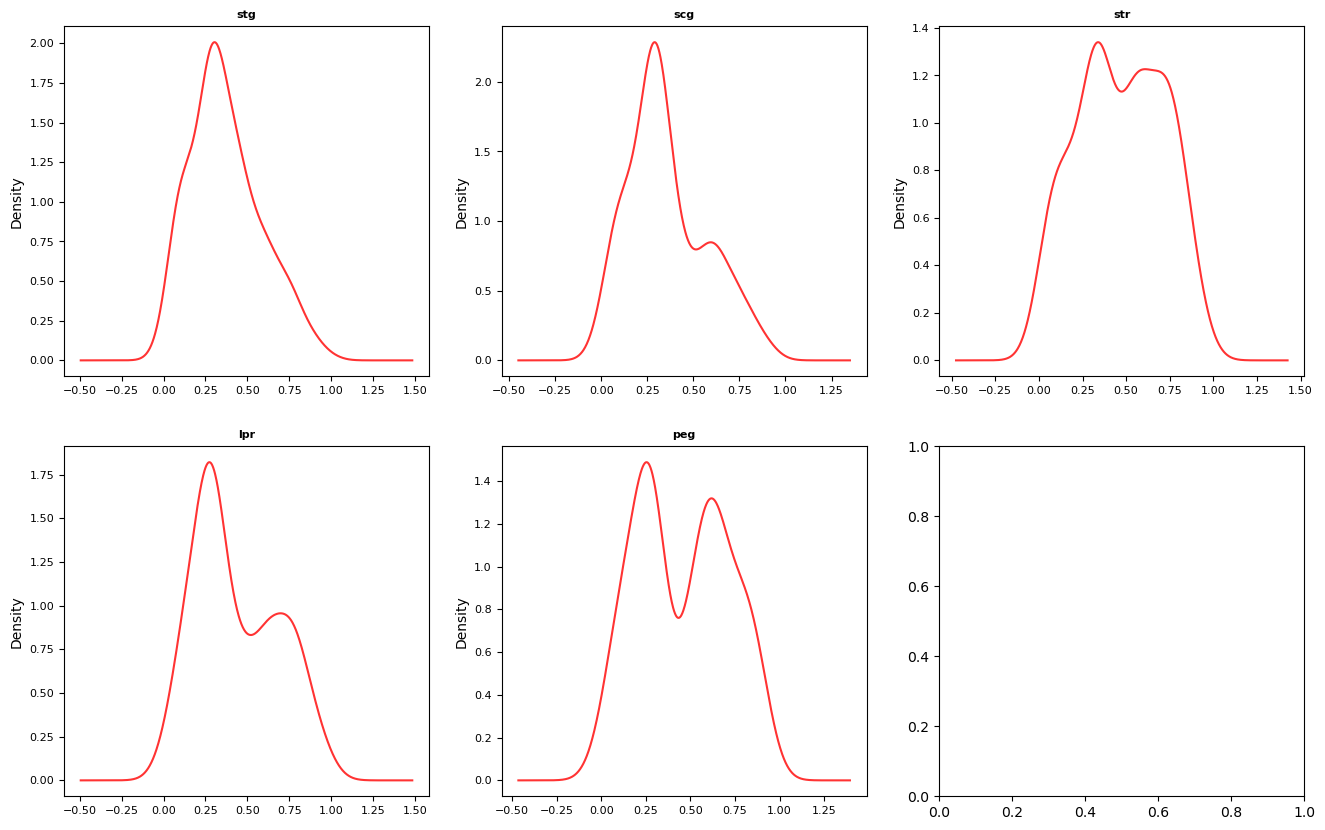

In [13]:
def grafico_eda_numericas(df_cont):
    from math import ceil
    #contamos las filas
    filas = ceil(df.shape[1]/3)
    #Creamos la matriz del gráfico
    f, ax = plt.subplots(nrows= filas, ncols= 3, figsize = (16, filas * 5))
    #aplanamos para iterar sobre el gráfico como si fuera de 1 dimensión
    ax = ax.flat
    #Creamos el bucle que añadimos en cada hueco de la matriz
    for cada, variable in enumerate(df_cont):
        df_cont[variable].plot.density(ax = ax[cada], color= 'r', alpha = 0.8)
        ax[cada].set_title(variable, fontsize = 8, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 8)

grafico_eda_numericas(num)

<Axes: >

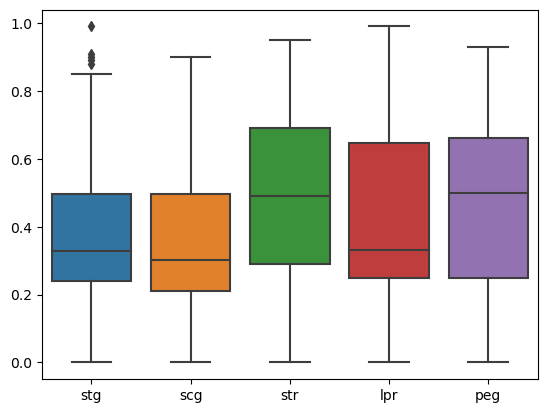

In [14]:
#Revisión de atípicos
sns.boxplot(num)

### Nulos

In [15]:
num.isna().sum()

stg    0
scg    0
str    0
lpr    0
peg    0
dtype: int64

### Atípicos

#### Por desviación típica

##### Identificación

###### Definir el número de desviaciones típicas

In [16]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [17]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [18]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

###### Variables a aplicar

In [19]:
var_atipicos_dt = num.columns.to_list()

###### Aplicar

In [20]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


stg:

Series([], Name: stg, dtype: int64)

scg:

Series([], Name: scg, dtype: int64)

str:

Series([], Name: str, dtype: int64)

lpr:

Series([], Name: lpr, dtype: int64)

peg:

Series([], Name: peg, dtype: int64)


No hay datos atípicos


## VERIFICAR TAMAÑO DE LOS DATASETS

In [22]:
print ('Categóricas:', cat.shape)
print ('Numéricas:', num.shape)

Categóricas: (258, 1)
Numéricas: (258, 5)


## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [26]:
#Definir nombres y rutas de los archivos

ruta_trabajo = '../../02_Datos/03_Trabajo/trabajo_resultado_calidad.pickle'
ruta_cat = '../../02_Datos/03_Trabajo/cat_resultado_calidad.pickle'
ruta_num  ='../../02_Datos/03_Trabajo/num_resultado_calidad.pickle'

#Guardamos los archivos

df.to_pickle(ruta_trabajo)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)